# Sources & Sinks

"When a flow is both frictionless and irrotational, pleasant things happen" (F.M. White, *Fluid Mechanics 4th ed.*). 

The theoretical basis for aerodynamics is *potential-flow theory*, the treament of fluids as being incompressible and irrotational. It begins with a few basic assumptions:

* Fluid flow is steady
* The velocity of the fluid is smaller than the speed of sound (the fluid is *incompresssible*)
* There is no internal friction within the fluid, i.e., it is an *inviscid* fluid
* The vorticity of the fluid is zero, i.e., it is *irrotational*, i.e., the *vorticity* is zero

It turns out that a plethora of physical systems can be accurately approximated under these assumptions. The effects of viscosity are typically confined to a very thin boundary layer of the fluid (and there are corrections for that), many flows are in fact irrotational, and most things that we'll be interested in do remain subsonic (below the speed of sound).

The beauty of potential-flow theory is that *it is linear*. Hence, the principle of superposition applies and we can therefore construct solutions to mathematical equations by simply adding together known solutions.

In this first notebook, two fundamental solutions to potential-flow are discussed: the **source** and the **sink**. 

## Mathematical Background

One of the simple governing equations of aerodynamics and transport phenomena is the *continuity equation*, a mathematical expression to express the conservation of mass (or energy, or some other extensive quantity). Analytically, it can be expressed in many ways but the expression we'll be concerned with is

$$\nabla\cdot\textbf{v}=0$$

for a vector field $\textbf{v}$. In other words, the divergence of the vector field defining fluid flow is zero.

Now, recall that we define the *circulation* $\Gamma$ of a vector field as the line integral of that vector field over some closed path:

$$\Gamma = \oint \textbf{v}\cdot d\textbf{s}$$

Above, $\textbf{v}=(u, v, w)$ is the velocity vector field. By Stokes' theorem, we have that the circulation is equal to the flux through the contour of the curl of the velocity. Moreover, we define the curl of the velocity as the *vorticity*, written $\omega=\nabla\times\textbf{v}$ so that we can rewrite the circulation of the vector field as 

$$\Gamma = \oint_s \textbf{v}\cdot d\textbf{s} = \iint_S(\nabla\times\textbf{v})\cdot d\textbf{S} = \iint_S\omega\cdot d\textbf{S} $$

Note that one of our key assumptions of potential-flow theory was that fluids are irrotational so that their vorticity is zero. This necessarily implies that the line integral of the velocity over a closed path is equal to zero (by Stokes' theorem). Now, suppose that our closed path travels from the point $A$ to $B$ and then back to $A$, not necessarily along the same direction. No matter what path we take, this closed curve *must* evaluate to zero so that $\textbf{v}$ is a *potential field* and there exists a potential function $\phi$ such that $\textbf{v}=\nabla\phi$. 

Finally, by the continuity equation, we get the elegant governing equation of potential-flow theory,

$$\nabla^2\phi=0$$

also known as *Laplace's equation*. 

## Visualization

`Julia` hosts a ton of built-in functions that allow us to do some math for potential-flow with minimal additional libraries. We will need to add a library for visualization, and for that we'll use `Makie`. In addition, `LaTeXStrings` is used so that we can make our plot labels a bit easier on the eyes.

In [3]:
using Pkg
Pkg.add("CairoMakie")
Pkg.add("LaTeXStrings")

using CairoMakie
using LaTeXStrings

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


Our ultimate goal is to visualize streamlines corresponding to a source and a sink. So, we first define a set of points where the velocity components will be computed. In Python, this corresponds to creating a `numpy.meshgrid()`. In Julia, we can broadcast functions onto vectors without any extra functions so that creating a grid of points is uneccesary. 

In [20]:
# Number of points
N = 50

# Lower and upper bounds for x and y
xb = (-2.0, 2.0)
yb = (-1.0, 1.0)

# x and y axes
X = range(xb[1], xb[2], N);
Y = range(yb[1], yb[2], N);

We can think of sources and sinks as singularity points in space where streamlines collapse. The data structure `singularity_point` will contain attributes which we can use to keep track of the type, strength, and position of these singularities, whether they be sources or sinks.

In [21]:
struct singularity_point
    kind::String
    strength::Float32
    x_pos::Number
    y_pos::Number
end

## Sources

Now we go about finally creating a singularity. The strength and position of the *source* are defined and then used to create a `singularity_point`.

We mentioned earlier that potential-flow enjoys linearity and solutions can be constructed by superposition. For this reason, it is incredibly useful to have a collection of elementary solutions to potential-flow problems that we can use to construct solutions to more complicated problems. Sources and sinks are such elementary solutions. 

A *source* is a point where we imagine fluid is flowing out or away from, uniformly. Hence, all streamlines radiate from a single point as straight lines and the velocities of the streamlines drop off inversely with the distance away from the source. This situation is most easily modeled using polar coordinates in two dimensions (or cylindrical coordinates in three dimensions). The velocity components become

$$\textbf{v}(r,\theta)=(u(r,\theta), v(r,\theta)) = \left(\frac{\Lambda}{2\pi r},~0\right)$$

for radial and tangential components $u=\Lambda/(2\pi r)$ and $v=0$, respectively. Note that $\Lambda$ represents the *strength* of the source. The condition that the tangential component of the velocity must be zero is clear from the fact that our streamlines are radiating as straight lines from the source with no angular dependence. The radial component of the velocity comes from the assumption that flow is irrotational and the continuity equation. 

To actually be able to plot streamlines we require the *streamline function*, denoted $\psi$. Briefly, note the important differences between the two functions that have been introduced: $\phi$ **is the potential function of the velocity of the fluid** and $\psi$ **is the streamline function which is everywhere tangent to the velocity**. Lines of constant $\phi$ are perpendicular to lines of constant $\psi$, except at stagnation points (stagnation points are those where the velocity is zero, that is, where the vector field is stagnant, hence the name). 

The streamline function is well established and given by the following set of equations,

$$u=\frac{\partial\psi}{\partial y},\quad v=-\frac{\partial\psi}{\partial x}$$

where $u$ and $v$ are the radial and tangential components of the velocity, defined as above (here, they're given in Cartesian coordinates but switching between coordinate systems is fairly straightforward). Note that this set of equations satisfies continuity, $\nabla\cdot\textbf{v}=0$ and Laplace's equation. In polar coordinates, these equations become

$$u=\frac{1}{r}\frac{\partial\psi}{\partial \theta},\quad v=-\frac{\partial\psi}{\partial r}$$

and using the expressions for $u$ and $v$ as functions of $r$ and $\theta$ established earlier we can determine a functional expression for the streamline function $\psi$.

$$u = \frac{1}{r}\frac{\partial\psi}{\partial \theta} = \frac{\Lambda}{2\pi r} ~\Rightarrow~ \frac{\partial\psi}{\partial\theta} = \frac{\Lambda}{2\pi} ~\Rightarrow~ \psi(\theta) = \frac{\Lambda}{2\pi}\theta + C$$

The partial derivative $\partial\psi/\partial r$ is ignored because clearly  $\psi(r)$ evaluates to zero.

To actually graph the velocity vector field we'll convert our expressions to Cartesian coordinates. Above we already noted that the streamline function is related to the components of the velocity vector field. We've just determined a functional expression for the streamline $\psi$ in polar coordinates, so all we have left to do is convert it to Cartesian and evaluate $u$ and $v$ to determine $\textbf{v}$. Recall that one of the identities for converting between polar and Cartesian coordinates is $\tan\theta=y/x$ so that $\theta=\tan^{-1}(y/x)$. Thus,

$$\psi(x,y) = \frac{\Lambda}{2\pi}\tan^{-1}\left(\frac{y}{x}\right) $$

and after remembering that $\frac{d}{dx}\tan^{-1}(x) = 1/(1+x^2)$, we can evaluate the partial derivatives of $\psi$ to afford $u$ and $v$.

$$u=\frac{\partial\psi}{\partial y}=\frac{\partial}{\partial y}\left[\frac{\Lambda}{2\pi}\tan^{-1}\left(\frac{y}{x}\right)\right] = \frac{\Lambda}{2\pi}\left[\frac{1}{1+\left(\frac{y}{x}\right)^2}\left(\frac{1}{x}\right)\right]=\frac{\Lambda}{2\pi}\frac{x}{x^2+y^2}$$

$$v=-\frac{\partial\psi}{\partial x}=-\frac{\partial}{\partial y}\left[\frac{\Lambda}{2\pi}\tan^{-1}\left(\frac{y}{x}\right)\right] = -\frac{\Lambda}{2\pi}\left[\frac{1}{1+\left(\frac{y}{x}\right)^2}\left(-\frac{y}{x^2}\right)\right]=\frac{\Lambda}{2\pi}\frac{y}{x^2+y^2}$$

These are our expressions for the components of the velocity vector field. We can account for a translation in the center of the source by simply shifting the $x$ and $y$ components by their centers. Our final expression for $\textbf{v}$ in Cartesian coordinates becomes

$$\textbf{v}(x,y) = \frac{\Lambda}{2\pi}\left(\frac{x-x_\text{source}}{(x-x_\text{source})^2+(y-y_\text{source})^2},~\frac{y-y_\text{source}}{{(x-x_\text{source})^2+(y-y_\text{source})^2}}\right)$$

Finally, we can go about choosing some parameters and graphing the streamlines for this velocity vector.

In [22]:
# Strength of source
strength_source = 5
# Position of source
x_source, y_source = -1.0, 0.0   

# Source singularity
source_field = singularity_point("Source", strength_source, x_source, y_source);

Given a field of points as we've created above, it remains to compute the velocity of the vector field at each point. Instead of iterating through all points in the grid and computing the velocity we can use element-wise operations on the vectors `X` and `Y` above to expedite the process. Unlike NumPy in Python, element-wise operations such as addition or multiplication are done automatically. In Julia, care must be taken to replace operations with their element-wise counterparts. A simple fix, but an important one nonetheless.

In [23]:
function velocity_field(field::singularity_point, x::Point2{Float64})
    """
    field = a singularity point
    x = positions of points in the vector field of the singularity
    """
    # Simply an implementation of the functions we derived above
    u_source = (field.strength/(2*pi) * (x[1].-field.x_pos)/((x[1].-field.x_pos).^2 + (x[2].-field.y_pos).^2))
    v_source = (field.strength/(2*pi) * (x[2].-field.y_pos)/((x[1].-field.x_pos).^2 + (x[2].-field.y_pos).^2))
    # Note that we return a Point type so that streamplot may be used later
    return Point(u_source, v_source)
end;

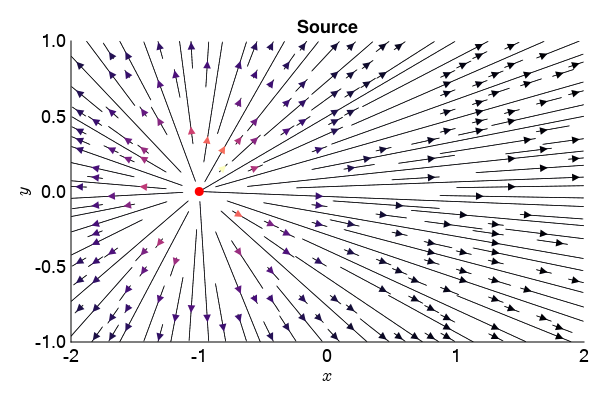

In [24]:
# Building figure
# The resolution() allows us to manipulate the dimensions of the figure
# set_theme!() allows us to drop the gridlines and make a construct elegant plot
f = Figure(resolution=(600, 400))
set_theme!(
    theme_minimal(),
    font = "CM Sans Serif",
    fontsize = 18
)

# Creating first axis to plot on
ax = Axis(f[1, 1], 
    xlabel = L"$x$", 
    ylabel = L"$y$",
    title = source_field.kind
)

# Setting axis limits
xlims!(ax, (minimum(X), maximum(X)))
ylims!(ax, (minimum(Y), maximum(Y)))

# Plotting
# Firstly, the streamplot is created. This corresponds to the lines and arrows of the figure
# An anonymous function is used to map the coordinates of X and Y onto the velocity field 
# using the source as a singularity
# Secondly,the scatter plot is created. This is built to more clearly illustrate the exact positions 
# of the source
streamplot!(x -> velocity_field(source_field, x), X, Y, 
    color=:black,
    colormap=:magma, 
    arrowsize=15,
    gridsize=(32, 32, 32),
    visible=true,
    linewidth=0.8
)
scatter!((source_field.x_pos, source_field.y_pos), color=:red)

# Displaying figure
current_figure()

## Bonus Round: Mass Flux from a Source

Oftentimes, we're interested in the flux through a small surface surrounding a source point. Above we related the flux to the surface integral of the vorticity $\omega$ and by Stokes' theorem related this surface integral to the circulation of the vector field $\textbf{v}$:

$$\text{Flux} = \iint_S\omega\cdot d\textbf{S} = \oint_s \textbf{v}\cdot d\textbf{s} $$

To compute the flux we simply need to compute one of these integrals. To avoid having to take a cross product, I'll elect to evaluate the line integral. Since the velocity vector field $\textbf{v}$ is radially symmetric, the simplest surface to choose to evaluate the flux out of the point will be a circle. By choosing a circle, we can simplify the line integral by taking advantage of symmetry:

$$\text{Flux} = \oint_s \textbf{v}\cdot d\textbf{s} = \int_0^{2\pi} |\textbf{v}| rd\theta $$

Above, $|\textbf{v}|$ represents the magnitude of the velocity vector field at any point in the grid and the line element $|d\textbf{s}|=rd\theta$ is found by a little bit of trigonometry. Note that the magnitude of the velocity vector field is

$$ |\textbf{v}| = \frac{\Lambda}{2\pi}\sqrt{\left(\frac{x}{x^2+y^2}\right)^2+\left(\frac{y}{x^2+y^2}\right)^2} = \frac{\Lambda}{2\pi}\frac{1}{\sqrt{x^2+y^2}} = \frac{\Lambda}{2\pi r}$$

so that our line integral simplifies nicely:

$$\text{Flux} = \int_0^{2\pi} |\textbf{v}| rd\theta = \int_0^{2\pi} \frac{\Lambda}{2\pi r} rd\theta = \frac{\Lambda}{2\pi}\int_0^{2\pi}d\theta = \Lambda$$

Ta-da! *The flux out of a small surface surrounding a source is the strength of the source!* Clearly, the parameter $\Lambda$ is pretty important.

## Sink

The sink is nearly the same as a source, except the strength $\sigma$ is chosen to be negative instead of positive. The results agree with our intuition, with the streamlines pointing *toward* the singularity instead of away from it, as in the case of a source. Because of this, we can use the same exact functions as we derived above to plot the sink.

In [25]:
# Strength of source
strength_sink = -5
# Position of source
x_sink, y_sink = 1.0, 0.0   

sink_field = singularity_point("Sink", strength_sink, x_sink, y_sink);

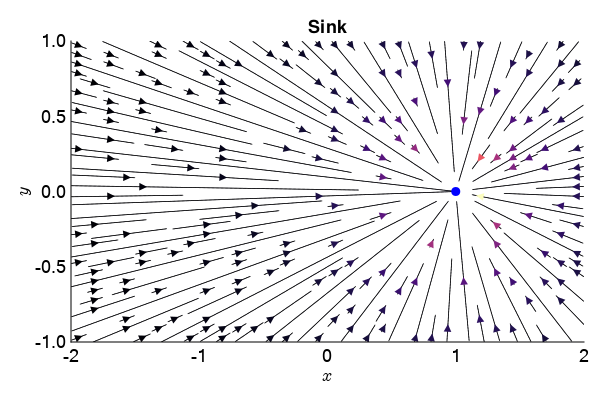

In [26]:
# Building figure
f = Figure(resolution=(600, 400))

# Creating first axis to plot on
ax = Axis(f[1, 1], 
    xlabel = L"$x$", 
    ylabel = L"$y$",
    title = sink_field.kind
)

# Setting axis limits
xlims!(ax, (minimum(X), maximum(X)))
ylims!(ax, (minimum(Y), maximum(Y)))

# Plotting
streamplot!(x -> velocity_field(sink_field, x), X, Y, 
    color=:black,
    colormap=:magma, 
    arrowsize=15,
    gridsize=(32, 32, 32),
    visible=true,
    linewidth=0.8
)
scatter!((sink_field.x_pos, sink_field.y_pos), color=:blue)

# Displaying figure
current_figure()

## Source-Sink Pair

With solutions to the source and sink in hand, we can flex our superposition muscles and consider a vector field containing both kinds of singularity. 

In [11]:
function field_pair(field1::singularity_point, field2::singularity_point, x::Point2{Float64})
    """
    field1 = singularity point
    field2 = singularity point
    x = positions of points in the vector field of the singularity
    """
    # Source/Sink
    field = field1
    u1 = (field.strength/(2*pi) * (x[1].-field.x_pos)/((x[1].-field.x_pos).^2 + (x[2].-field.y_pos).^2))
    v1 = (field.strength/(2*pi) * (x[2].-field.y_pos)/((x[1].-field.x_pos).^2 + (x[2].-field.y_pos).^2))
    
    # Sink/Source
    field = field2
    u2 = (field.strength/(2*pi) * (x[1].-field.x_pos)/((x[1].-field.x_pos).^2 + (x[2].-field.y_pos).^2))
    v2 = (field.strength/(2*pi) * (x[2].-field.y_pos)/((x[1].-field.x_pos).^2 + (x[2].-field.y_pos).^2))
    
    # Return a superposition of the vector fields affored by the source and sink pair
    return Point(u1+u2, v1+v2)
end;

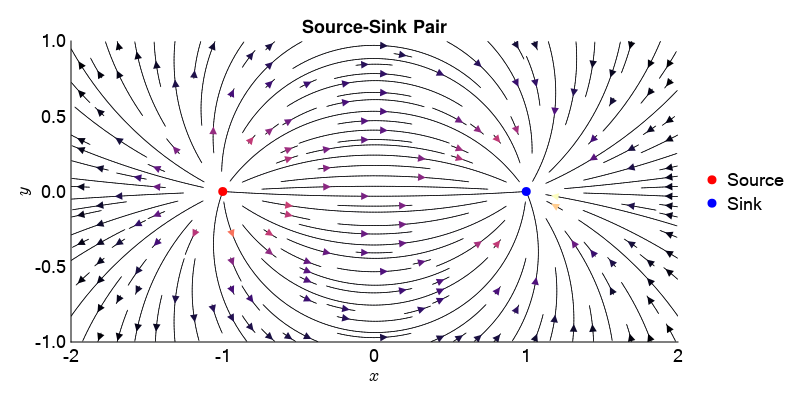

In [27]:
# Building figure
f = Figure(resolution=(800, 400), xgridvisible=false)

# Creating first axis to plot on
ax = Axis(f[1, 1], 
    xlabel = L"$x$", 
    ylabel = L"$y$",
    title = "Source-Sink Pair"
)

# Setting axis limits
xlims!(ax, (minimum(X), maximum(X)))
ylims!(ax, (minimum(Y), maximum(Y)))

# Plotting
streamplot!(f[1,1], 
    x -> field_pair(source_field, sink_field, x), X, Y, 
    color=:black,
    colormap=:magma, 
    arrowsize=15,
    gridsize=(32, 32, 32),
    visible=true,
    linewidth=0.8
)
sca_source = scatter!(f[1,1], (source_field.x_pos, source_field.y_pos), color=:red)
sca_sink = scatter!(f[1,1], (sink_field.x_pos, sink_field.y_pos), color=:blue)

# A legend is displayed to delineate which point is the source and which is the sink
Legend(f[1,2], [sca_source, sca_sink], ["Source", "Sink"])

# Displaying figure
current_figure()

## Source-Sink Thruple

We'll conclude by generating some velocity vector fields with singularities of varying strengths and positions. A 2x2 grid is created below to illustrate how three source/sink thruples interact in two-dimensional space. Unlike before, the points which are sources and those which are sinks aren't labelled. Try and figure our which are which!

Keep in mind that since the points and strengths are generated at random each time, the vector field below may look slightly different from if you ran the cell another time.

In [13]:
function field_thruple(
        field1::singularity_point, 
        field2::singularity_point, 
        field3::singularity_point, 
        x::Point2{Float64}
    )
    """
    field1 = singularity point
    field2 = singularity point
    field3 = singularity point
    x = positions of points in the vector field of the singularity
    """
    # Source/Sink
    field = field1
    u1 = (field.strength/(2*pi) * (x[1].-field.x_pos)/((x[1].-field.x_pos).^2 + (x[2].-field.y_pos).^2))
    v1 = (field.strength/(2*pi) * (x[2].-field.y_pos)/((x[1].-field.x_pos).^2 + (x[2].-field.y_pos).^2))
    
    # Source/Sink
    field = field2
    u2 = (field.strength/(2*pi) * (x[1].-field.x_pos)/((x[1].-field.x_pos).^2 + (x[2].-field.y_pos).^2))
    v2 = (field.strength/(2*pi) * (x[2].-field.y_pos)/((x[1].-field.x_pos).^2 + (x[2].-field.y_pos).^2))
    
    # Source/Sink
    field = field3
    u3 = (field.strength/(2*pi) * (x[1].-field.x_pos)/((x[1].-field.x_pos).^2 + (x[2].-field.y_pos).^2))
    v3 = (field.strength/(2*pi) * (x[2].-field.y_pos)/((x[1].-field.x_pos).^2 + (x[2].-field.y_pos).^2))
    
    # Return a superposition of the vector fields affored by the singularities
    return Point(u1+u2+u3, v1+v2+v3)
end;

In [28]:
# Number of points
N = 50

# Lower and upper bounds for x and y
xb = (-10.0, 10.0)
yb = (-10.0, 10.0)

# x and y axes
X = range(xb[1], xb[2], N);
Y = range(yb[1], yb[2], N);

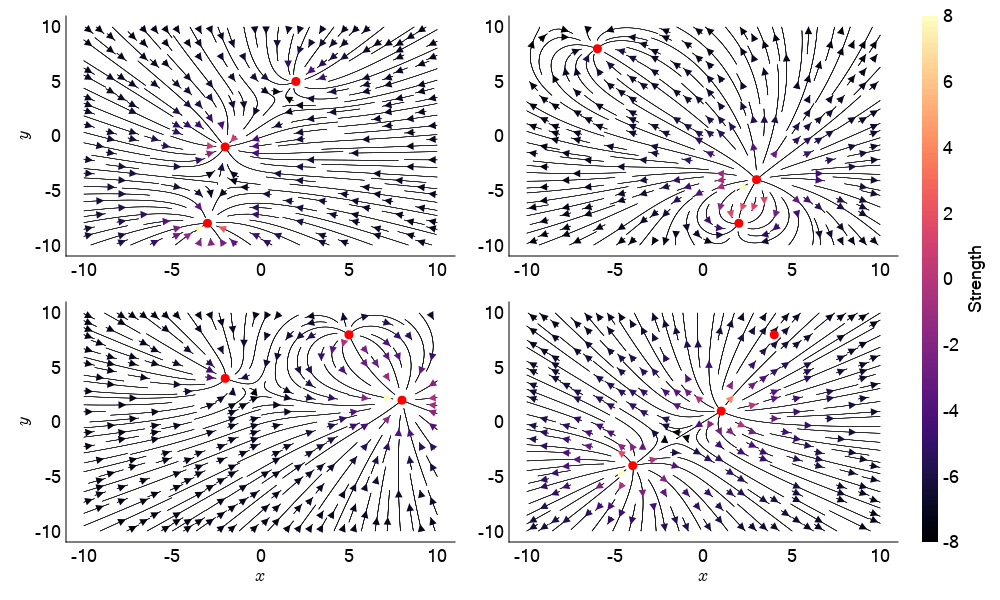

In [29]:
# Building figure
# Creating first axis to plot on
# Setting axis limits
# Defining theme
f = Figure(resolution=(1000, 600))

# Parameters for each of the plots
params = Dict("color" => :black, "colormap" => :magma, "linewidth" => 0.5)

# Generating random fields
fields = []
strengths = []
for i in 1:12
    r = rand(-8:8, 3)
    field = singularity_point("Type", r[1], r[2], r[3])
    push!(fields, field)
    push!(strengths, field.strength)
end

##############
### PLOT 1 ###
##############
ax = Axis(f[1, 1], ylabel = L"$y$",)

streamplot!(ax, 
    x -> field_thruple(fields[1], fields[2], fields[3], x), X, Y, 
    color = params["color"],
    colormap = params["colormap"], 
    linewidth = params["linewidth"]
)

for field in [fields[1], fields[2], fields[3]]
    scatter!(ax, (field.x_pos, field.y_pos), color=:red)
end

##############
### PLOT 2 ###
##############
ax = Axis(f[1, 2])

streamplot!(ax, 
    x -> field_thruple(fields[4], fields[5], fields[6], x), X, Y, 
    color = params["color"],
    colormap = params["colormap"], 
    linewidth = params["linewidth"]
)

for field in [fields[4], fields[5], fields[6]]
    scatter!(ax, (field.x_pos, field.y_pos), color=:red)
end

##############
### PLOT 3 ###
##############
ax = Axis(f[2, 1], xlabel = L"$x$", ylabel = L"$y$")

streamplot!(ax, 
    x -> field_thruple(fields[7], fields[8], fields[9], x), X, Y, 
    color = params["color"],
    colormap = params["colormap"], 
    linewidth = params["linewidth"]
)

for field in [fields[7], fields[8], fields[9]]
    scatter!(ax, (field.x_pos, field.y_pos), color=:red)
end

##############
### PLOT 4 ###
##############
ax = Axis(f[2, 2], xlabel = L"$x$")

streamplot!(ax, 
    x -> field_thruple(fields[10], fields[11], fields[12], x), X, Y, 
    color = params["color"],
    colormap = params["colormap"], 
    linewidth = params["linewidth"]
)

for field in [fields[10], fields[11], fields[12]]
    scatter!(ax, (field.x_pos, field.y_pos), color=:red)
end

################
### COLORBAR ###
################
cb = Colorbar(f[1:2, 3], colormap=:magma, limits=(minimum(strengths), maximum(strengths)), label="Strength")

# Displaying figure
current_figure()

## Bonus Round: The Potential Field

Above we concerned ourselves with *streamlines* which gave us an intuitive idea of how particles in the vector fields actually moved. The *potential lines*, meanwhile, are always perpendicular to streamlines. Fortunately, the potential function $\phi$ and stream function $\psi$ are related to the components of the velocity and one another nicely:

$$u = \frac{\partial\phi}{\partial x} = \frac{\partial\psi}{\partial y}$$
$$v = \frac{\partial\phi}{\partial y} = -\frac{\partial\psi}{\partial x}$$

We've already done the work to determine functional expressions for $u(x,y)$ and $v(x,y)$ so determining an expression for $\phi$ shouldn't be too hard. All that's required is a little bit of integration:

$$\partial\phi = u\partial x = \left(\frac{\sigma}{2\pi}\frac{x}{x^2+y^2}\right)\partial x $$
$$\phi = \frac{\sigma}{2\pi}\int\frac{x}{x^2+y^2}\partial x = \frac{\sigma}{4\pi}\ln\left(x^2+y^2\right) + C$$

Check for yourself that this expression satisfies $v =\partial\phi/\partial y$ so that the potential function for a source (or sink) in Cartesian coordinates becomes

$$\phi(x,y) =\frac{\sigma}{4\pi}\ln\left(x^2+y^2\right)$$

Onto coding! Firstly we define a function to compute the potential of the velocity field.

In [16]:
function potential_flow(
        field1::singularity_point, field2::singularity_point,
        x::Float64, y::Float64)
    """
    field1 = singularity point
    field2 = singularity point
    x, y = x and y positions of points in the vector field of the singularity
    """
    # Source/Sink
    field = field1
    phi1 = field.strength/(4*pi) * log((x.-field.x_pos).^2 + (y.-field.y_pos).^2)
    #phi1 = field.strength/(4*pi) * log(x.^2 + y.^2)
    
    # Sink/Source
    field = field2
    phi2 = (field.strength/(4*pi)) * log((x.-field.x_pos).^2 + (y.-field.y_pos).^2)
    #phi2 = field.strength/(4*pi) * log(x.^2 + y.^2)
    
    # Return a superposition of the vector fields affored by the singularities
    return phi1 + phi2
    
end;

Some points and ranges are defined similar to how they were above

In [30]:
# Number of points
N = 100

# Lower and upper bounds for x and y
xb = (0.0, 100.0)
yb = (0.0, 100.0)

# x and y axes
X = range(xb[1], xb[2], N);
Y = range(yb[1], yb[2], N);

Finally, the figure is created using a `contour()` plot and a scatter plot is placed on top to make it more clear which point is the source and which is the sink. 

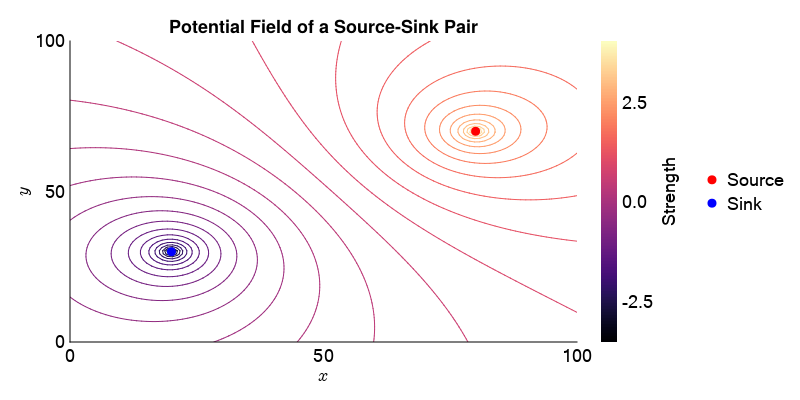

In [33]:
# Building figure
f = Figure(resolution=(800, 400), xgridvisible=false)

ax = Axis(f[1,1],
    title = "Potential Field of a Source-Sink Pair",
    xlabel = L"$x$",
    ylabel = L"$y$"
)
xlims!(minimum(X), maximum(X))
ylims!(minimum(Y), maximum(Y))

# potential field
source_field = singularity_point("Source", -4, 80, 70)
sink_field = singularity_point("Sink", 5, 20, 30)
Z = [potential_flow(source_field, sink_field, x, y) for x in X, y in Y]

# Plotting
c = contour!(Z, levels=30, colormap=:magma)
sca_source = scatter!(ax, (source_field.x_pos, source_field.y_pos), color=:red)
sca_sink = scatter!(ax, (sink_field.x_pos, sink_field.y_pos), color=:blue)

# colorbar
cb = Colorbar(f[1, 2], limits=(minimum(Z), maximum(Z)), colormap=:magma, label="Strength")
# legend
Legend(f[1,3], [sca_source, sca_sink], ["Source", "Sink"])

# Displaying figure
current_figure()

Let's compare the position and strengths of the contour lines to our intution about potential functions. Firstly, the source. As we get closer and closer to the source, potential lines grow stronger (look at the color bar) and becomes more closely spaced. Intuitively, this should make sense because a source is a point of positive strength: it pushes particles *away* from it. So, it should be harder and harder to get near the source as we grow close to it, hence, the potential increases (thinking of potential in terms of potential energy, or maybe electric potential typically helps me rationalize these results). 

Contrast this with the sink. As we grow nearer and nearer to the sink, once again, potential lines become more closely spaced, however, the strength becomes negative, indicating that it actually becomes *easier* to approach the sink as we grow closer to it.

Compare this plot to what the streamline plot might look like based on the source-sink pair we plotted above. As expected, the lines of the potential function are perpendicular to the streamlines everywhere.